<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week10/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICUM
Noora Aulia Hidayat

2041720046

TI - 3I

https://github.com/noora20FH/PCVK/blob/week10/week10.ipynb 

In [ ]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL.Image

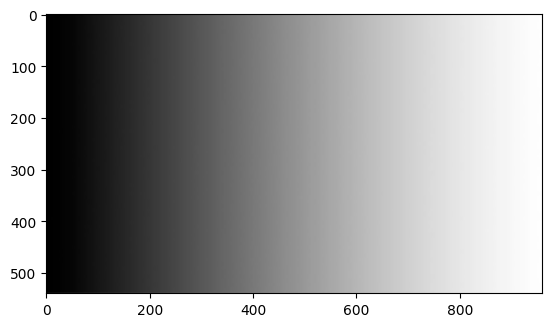

In [11]:
img_ori = cv.imread('/content/drive/MyDrive/gradient.jpg')

img = cv.cvtColor(img_ori, cv.IMREAD_GRAYSCALE)
plt.imshow(img)

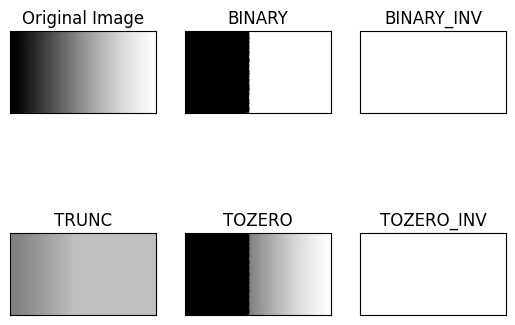

In [8]:


assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#no. 1 Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,TOZERO_INV) according to the description from the chart shown above.

##BINARY

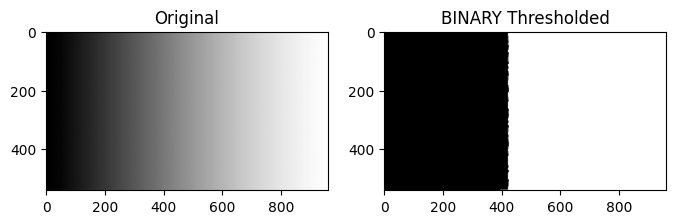

In [28]:

# Apply thresholding using NumPy
threshold_value = 127
img_thresholded = np.where(img > threshold_value, 255, 0)

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY Thresholded')
plt.show()

##BINARY_INV

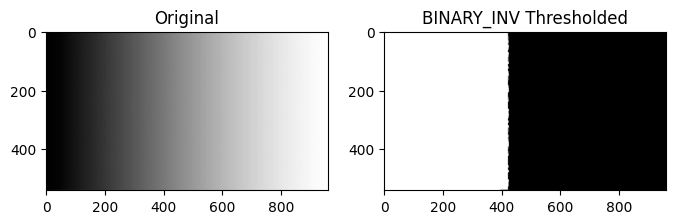

In [40]:

img_arr = np.array(img)

# Apply thresholding using NumPy
threshold_value = 127
# img_thresholded = np.where(img > threshold_value, 0, 255)

# Create a binary image with inverse thresholding
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255


# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()

##TRUNCT

In [44]:
img_arr = np.array(img)
# Set the threshold value
threshold_value = 127

# Apply the thresholding with TRUNC
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = threshold_value
        else:
            img_thresholded[i, j] = img_arr[i, j]


##TOZERO

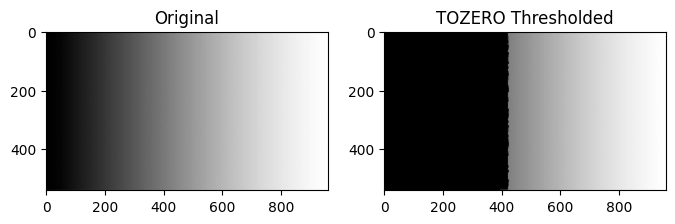

In [45]:
# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = img_arr[i, j]
        else:
            img_thresholded[i, j] = 0
            

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('TOZERO Thresholded')
plt.show()

##TOZERO_INV

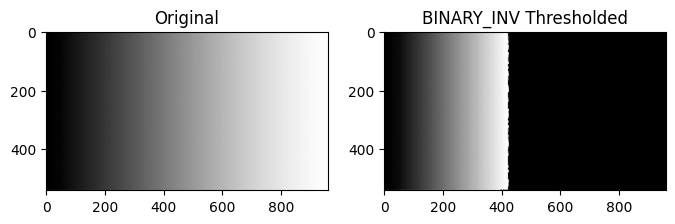

In [42]:

# Set the threshold value
threshold_value = 127

# Apply the thresholding with TOZERO_INV
rows, cols = img_arr.shape
img_thresholded = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if img_arr[i, j] > threshold_value:
            img_thresholded[i, j] = 0
        else:
            
            img_thresholded[i, j] = img_arr[i, j]

# Display the original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_thresholded, cmap='gray')
axs[1].set_title('BINARY_INV Thresholded')
plt.show()